In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import matplotlib.pylab as plt
import healpy as hp
import time

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/utils.py:27: UserWarning: Could not import ts.scheduler. This is required to load the FieldsDatabase. In this case
it will fallback to loading fields from the local "fieldID.lis" file.
  it will fallback to loading fields from the local "fieldID.lis" file.''')


In [11]:
survey_length = 32.  # days
nside = fs.set_default_nside(nside=32)
years = np.round(survey_length/365.25)
filtername = 'r'

In [12]:
target_map = fs.standard_goals(nside=nside)[filtername]

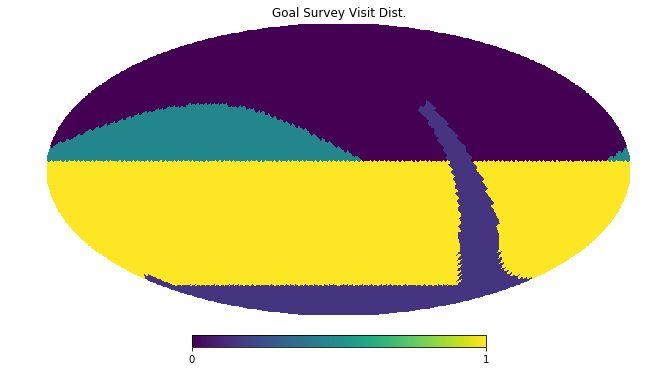

In [13]:
hp.mollview(target_map, title='Goal Survey Visit Dist.')

In [14]:
# How to normalize the basis function
norm_factor = fs.calc_norm_factor({'r':target_map})

In [18]:
# List to hold basis functions
bfs = []

bfs.append(fs.M5_diff_basis_function(filtername=filtername, nside=nside))
bfs.append(fs.Target_map_basis_function(filtername=filtername,
                                            target_map=target_map,
                                            out_of_bounds_val=hp.UNSEEN, nside=nside,
                                            norm_factor=norm_factor))
bfs.append(fs.Slewtime_basis_function(filtername=filtername, nside=nside))

weights = [1., 1., 0.3]

In [20]:
survey = fs.Greedy_survey_fields(bfs, weights, block_size=1, filtername=filtername,
                                           dither=True, nside=nside, ignore_obs='DD')

In [21]:
scheduler = fs.Core_scheduler([survey], nside=nside)

In [22]:
observatory = Speed_observatory(nside=nside, quickTest=True)

In [24]:
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='example_%iyrs.db' % years,
                                                     delete_past=True)

/Users/yoachim/gitRepos/sims_seeingModel/python/lsst/sims/seeingModel/seeingModel.py:133: RuntimeWarning: invalid value encountered in power
  airmass_correction = np.power(airmass, 0.6)


progress = 26.8%

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:313: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')
/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:229: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')


progress = 109.4%Skipped 0 observations
Completed 17176 observations


TypeError: 'float' object is not iterable

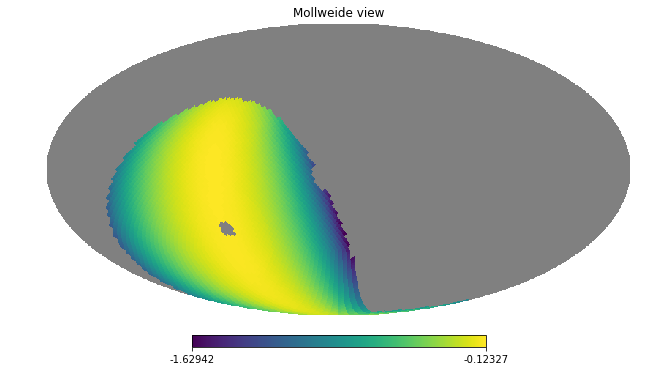

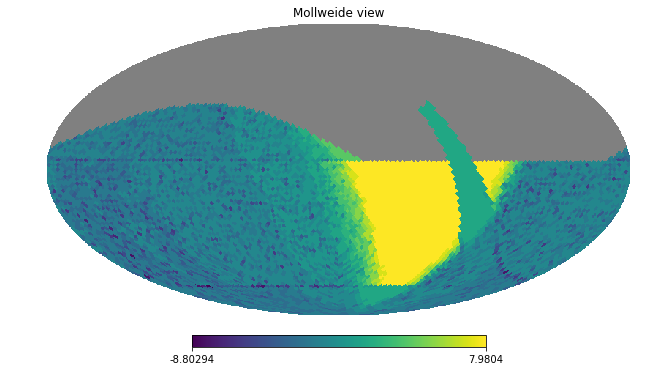

In [26]:
for bf in bfs:
    hp.mollview(bf())